Dimensionality reduction algorithms deal with unlabeled data. When training such an algorithm, the fit() method only needs the feature matrix, X as the input and it does not require the label column, y.

As its name implies, non-negative matrix factorization (NMF) needs the feature matrix to be non-negative.

Because of this non-negativity constraint, the usage of NMF is limited to data with non-negative values such as image data (pixel values always lie between 0 and 255, hence there are no negative values in image data!).

# The maths behind non-negative matrix factorization (NMF)

Non-negative matrix factorization (NMF) is the process of decomposing a non-negative feature matrix, V (nxp) into a product of two non-negative matrices called W (nxd) and H (dxp). All three matrices should contain non-negative elements.

<img src="nmf_matrix.png" style="width:400px;height:150px;background-color:white">

The product of W and H matrices only gives an approximation to the matrix V. So, you should expect some information loss when applying NMF.

- V (n x p): Represents the feature matrix where n is the number of observations (samples) and p is the number of features (variables). This is the data matrix we decompose.
- W (n x d): Represents the transformed data matrix after applying NMF. We can use this transformed matrix in place of the original feature matrix, V. So, **W is the most important output of NMF.** It is obtained by calling Scikit-learn NMF’s `fit_transform()` method. n is the number of observations (samples) and **d is the number of latent factors or components**. In other words, d describes the amount of dimensionality that we want to keep. It is actually a hyperparameter that we need to specify in the Scikit-learn NMF’s `n_components` argument. This is an integer value that should be less than the number of features, p and greater than 0. Selecting the right value for d is a real challenge when performing NMF. We need to consider the balance between the amount of information and the number of components that we want to keep.

In [1]:
from sklearn.decomposition import NMF

# W = transformed data matrix, V = original feature matrix

- H (d x p): Represents the **factorization matrix.** d and p have the same definitions above. This matrix is not very important. However, this can be obtained by calling the Scikit-learn NMF’s `components_` attribute.

In [2]:
# H = factorization matrix

# Python implementation of non-negative matrix factorization (NMF)

### Important arguments of `NMF()` class

- `n_components`: An integer that defines the number of components or latent factors or the amount of dimensionality that we want to keep. The most important hyperparameter! The value is less than the number of original features and greater than 0.
- `init`: A method of the initialization process. To learn more about this, refer to the Scikit-learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF). The output returned by the NMF model will significantly vary depending on the init method you choose.
- `random_state`: Used when the initialization method is ‘nndsvdar’ or ‘random’. Use an integer to get the same results across different executions.

### Important methods of `NMF()` class

- `.fit(V)`: Learns an NMF model from the feature matrix, V. No transformation is applied here.

- `.fit_transform(V)`: Learns an NMF model from the feature matrix, V and returns the transformed data matrix, W.

- `.transform(V)`: Returns the transformed data matrix, W after fitting the model.

- `.inverse_transform(W)`: Transforms (recovers) the data matrix, W back to the original space. Very useful for visualization purposes!

### Important attributes of `NMF()` class

- `components_`: Returns the factorization matrix, H. This matrix is not very important.

- `reconstruction_err_`: Returns the beta divergence as a float that measures the distance between V and the product of WH. The solver tries to minimize this error during the training process. Analyzing this error by setting different values for `n_components` is a great way of choosing the right number of components, `d`.

# Reducing dimensionality in image data using non-negative matrix factorization (NMF)

### Step 1: Load the MNIST dataset using Scikit-learn

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
image_data = mnist["data"]

print("Shape:", image_data.shape)
print("Type:", type(image_data))

C:\Users\johnw\miniconda3\envs\ls_env\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape: (70000, 784)
Type: <class 'pandas.core.frame.DataFrame'>


There are 70000 observations (images) in the dataset. Each observation has 784 features (pixel values). The size of an image is 28 x 28. When loading the MNIST dataset in this way, each image is represented as a 1D array that contains 784 (28 x 28) elements. This is the format we need for this task and no further modification is required for the dataset.

### Step 2: Visualize a sample of the original images

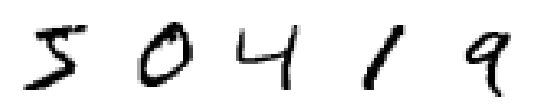

In [4]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(image_data.iloc[i].values.reshape(28, 28), cmap="binary")
    ax.axis("off")

plt.show()

### Step 3: Apply NMF with 9 components (d = 9)

In [5]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=9, init="random", random_state=0)
image_data_nmf = nmf_model.fit_transform(image_data)

print("Shape:", image_data_nmf.shape)
print("Type:", type(image_data_nmf))

Shape: (70000, 9)
Type: <class 'numpy.ndarray'>


Now, the new dimensionality is 9. The original dimensionality was 784. Therefore, the dimensionality has been significantly reduced!

To get the shape of V, W and H matrices, we can run the following code.

In [6]:
print("V_shape:", image_data.shape)
print("W_shape:", image_data_nmf.shape)
print("H_shape", nmf_model.components_.shape)

V_shape: (70000, 784)
W_shape: (70000, 9)
H_shape (9, 784)


To get the reconstruction error or beta divergence between V and the product of WH, we can run the following code.

In [7]:
nmf_model.reconstruction_err_

378865.63664703665

The reconstruction error is very high. This is because we have selected only 9 components out of 784. We can verify this by visualizing the output.

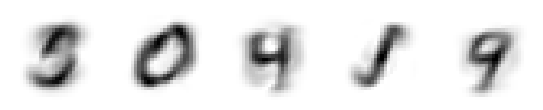

In [8]:
image_data_nmf_recovered = nmf_model.inverse_transform(image_data_nmf)

n = 5
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(image_data_nmf_recovered[i, :].reshape(28, 28), cmap="binary")
    ax.axis("off")

plt.show()

### Step 4: Apply NMF with 225 components (d = 225)

In [9]:
nmf_model = NMF(n_components=225, init="random", random_state=0)
image_data_nmf = nmf_model.fit_transform(image_data)

print("Shape:", image_data_nmf.shape)
print("Type:", type(image_data_nmf))

C:\Users\johnw\miniconda3\envs\ls_env\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Shape: (70000, 225)
Type: <class 'numpy.ndarray'>


In [10]:
print("V_shape:", image_data.shape)
print("W_shape:", image_data_nmf.shape)
print("H_shape", nmf_model.components_.shape)

V_shape: (70000, 784)
W_shape: (70000, 225)
H_shape (225, 784)


In [11]:
nmf_model.reconstruction_err_

104024.62402690166

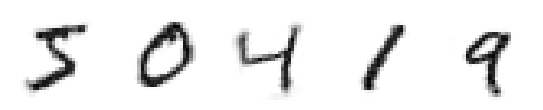

In [12]:
image_data_nmf_recovered = nmf_model.inverse_transform(image_data_nmf)

n = 5
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(image_data_nmf_recovered[i, :].reshape(28, 28), cmap="binary")
    ax.axis("off")

plt.show()

When the number of components is increased when running non-negative matrix factorization (NMF), the images are getting clear and the reconstruction error is getting low.

### Step 4: Apply NMF with 784 components (d = 784)

In [13]:
nmf_model = NMF(n_components=784, init="random", random_state=0)
image_data_nmf = nmf_model.fit_transform(image_data)

print("Shape:", image_data_nmf.shape)
print("Type:", type(image_data_nmf))

C:\Users\johnw\miniconda3\envs\ls_env\lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Shape: (70000, 784)
Type: <class 'numpy.ndarray'>


In [14]:
print("V_shape:", image_data.shape)
print("W_shape:", image_data_nmf.shape)
print("H_shape", nmf_model.components_.shape)

V_shape: (70000, 784)
W_shape: (70000, 784)
H_shape (784, 784)


In [15]:
nmf_model.reconstruction_err_

23349.67334884102

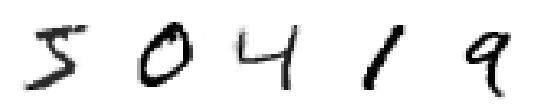

In [16]:
image_data_nmf_recovered = nmf_model.inverse_transform(image_data_nmf)

n = 5
plt.figure(figsize=(6.75, 1.5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(image_data_nmf_recovered[i, :].reshape(28, 28), cmap="binary")
    ax.axis("off")

plt.show()

With d = 784 (all components), you will still get a reconstruction error of 23349.67 instead of zero.